In [138]:
import pandas as pd

In [139]:
# Daten der Befragung auslesen
dataset = pd.read_stata('../data/external/ZA6647_v1-0-0.dta')

In [140]:
# Unerwünschte Spalten definieren und löschen
cols_to_delete = ['studyno', 'doi', 'version', 'edition', 'survey']
dataset = dataset.drop(columns=cols_to_delete)

In [141]:
# Spalten für Alter und Geschlecht umbenennen
cols_to_rename = {
    'd1': 'age',
    'd2': 'gender',
}
dataset = dataset.rename(columns=cols_to_rename)

In [142]:
# Übersicht über Antworten zu Frage 8 nach Land
pd.crosstab(dataset['q8'], dataset['country'])

country,FR - France,BE - Belgium,NL - The Netherlands,DE - Germany,IT - Italy,LU - Luxembourg,DK - Denmark,IE - Ireland,GB - United Kingdom,GR - Greece,...,HU - Hungary,LV - Latvia,LT - Lithuania,MT - Malta,PL - Poland,SK - Slovakia,SI - Slovenia,BG - Bulgaria,RO - Romania,HR - Croatia
q8,,,,,,,,,,,,,,,,,,,,,
Use it if the product looks all right and the packaging is not damaged,637,531,598,764,564,317,563,474,566,316,...,564,608,487,169,523,493,699,361,256,553
You throw it away,266,368,284,147,313,130,296,439,329,609,...,319,268,371,266,368,416,193,559,654,333
You never look at dates (DO NOT READ OUT),2,1,4,2,1,2,2,0,0,1,...,9,3,6,2,0,2,4,2,1,6
It depends on the type of food (DO NOT READ OUT),93,81,93,52,104,50,119,76,86,64,...,80,84,69,66,60,79,89,60,57,89
DK/NA,10,20,23,35,21,3,27,11,21,10,...,31,40,67,12,49,27,20,19,48,19


Anzahl der Antworten "Wegwerfen":

In [143]:
throw_per_country= dataset[dataset['q8']=='You  throw it away']['country'].value_counts()
throw_per_country

RO - Romania              654
GR - Greece               609
BG - Bulgaria             559
IE - Ireland              439
PT - Portugal             419
SK - Slovakia             416
LT - Lithuania            371
BE - Belgium              368
PL - Poland               368
HR - Croatia              333
GB - United Kingdom       329
HU - Hungary              319
ES -Spain                 316
IT - Italy                313
CY - Cyprus (Republic)    300
DK - Denmark              296
NL - The Netherlands      284
CZ - Czech Republic       283
LV - Latvia               268
FR - France               266
MT - Malta                266
FI - Finland              257
SI - Slovenia             193
EE - Estonia              192
SE - Sweden               167
DE - Germany              147
LU - Luxembourg           130
AT - Austria              116
Name: country, dtype: int64

Anzahl der Befragten je Land:

In [144]:
participants_per_country = dataset['country'].value_counts()
participants_per_country

SK - Slovakia             1017
RO - Romania              1016
FR - France               1008
DK - Denmark              1007
ES -Spain                 1007
SI - Slovenia             1005
LV - Latvia               1003
IT - Italy                1003
AT - Austria              1003
HU - Hungary              1003
NL - The Netherlands      1002
GB - United Kingdom       1002
PT - Portugal             1002
BE - Belgium              1001
BG - Bulgaria             1001
FI - Finland              1001
DE - Germany              1000
IE - Ireland              1000
HR - Croatia              1000
GR - Greece               1000
CZ - Czech Republic       1000
EE - Estonia              1000
LT - Lithuania            1000
PL - Poland               1000
SE - Sweden               1000
MT - Malta                 515
CY - Cyprus (Republic)     503
LU - Luxembourg            502
Name: country, dtype: int64

Prozentanteil der "Wegwerfer" an der Gesamtheit der Befragten:

In [145]:
percentage_throw_per_country = throw_per_country / participants_per_country*100
percentage_throw_per_country
#Prozente aufsteigend sortieren
sorted_percentage_throw_per_country = percentage_throw_per_country.sort_values(ascending=True)
sorted_percentage_throw_per_country

AT - Austria              11.565304
DE - Germany              14.700000
SE - Sweden               16.700000
EE - Estonia              19.200000
SI - Slovenia             19.203980
FI - Finland              25.674326
LU - Luxembourg           25.896414
FR - France               26.388889
LV - Latvia               26.719840
CZ - Czech Republic       28.300000
NL - The Netherlands      28.343313
DK - Denmark              29.394240
IT - Italy                31.206381
ES -Spain                 31.380338
HU - Hungary              31.804586
GB - United Kingdom       32.834331
HR - Croatia              33.300000
BE - Belgium              36.763237
PL - Poland               36.800000
LT - Lithuania            37.100000
SK - Slovakia             40.904621
PT - Portugal             41.816367
IE - Ireland              43.900000
MT - Malta                51.650485
BG - Bulgaria             55.844156
CY - Cyprus (Republic)    59.642147
GR - Greece               60.900000
RO - Romania              64

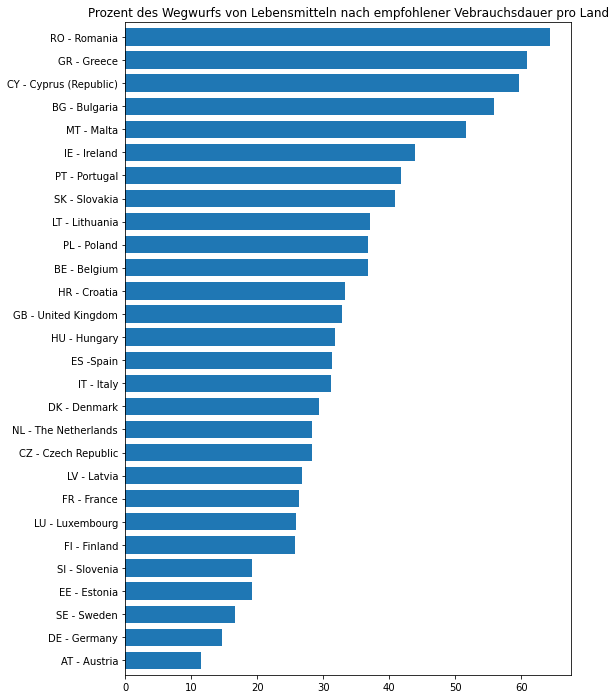

In [146]:
throwplot = sorted_percentage_throw_per_country.plot.barh(title='Prozent des Wegwurfs von Lebensmitteln nach empfohlener Vebrauchsdauer pro Land', figsize=(8,12),width=0.75)

# Ergebnis:

In Rumänien, Griechenland und Zypern werden Lebensmittel nach der empfohlenen Verbrauchsdauer am ehesten weggeworfen, wohingegen sie in Schweden, Deutschland und Österreich am wenigsten weggeworfen werden.

Download des Graphs:

In [147]:
fig = throwplot.get_figure()
fig.savefig('throwplot.png', dpi=300, facecolor='white', bbox_inches = 'tight')